# Initial EDA

In [3]:
#Initial Multinomial Regression (on Age) for entire dataset with complete metadata (Age)
#Importing of initial libraries for data manipulation and visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#Download into python dataset (from Excel worksheets) and conversion into dataframes
path = 'C:\\Users\\mikec\\OneDrive\\Composite Exp Data for GraphPad 9.15.24a.xlsx'

#df will be dataframe of all 92 subjects with Age and calculated metrics
df = pd.read_excel(path, sheet_name='Preworked before code')
df = df.drop(['Subject', 'Gender'], axis=1)

#df1 will be dataframe of 4 subjects without Age metadata from author's zipfile
df1 = pd.read_excel(path, sheet_name='Data for Age Guess')
df1 = df1.drop(['Subject', 'Age (years)', 'Gender'], axis=1)

#dfy will be single column dataframe of Age for linear regression statistics
dfy = df['Age (years)']

#Importing useful libraries for model fitting and model accuracy/relevance statistics
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Data wrangling and removing of dummies (in this case a placeholder for eventual Gender classification addition to the model
df1_new = pd.get_dummies(df1, dummy_na=True, dtype=int)

df1_new1 = df1.iloc[[0]].copy()
df1_new2 = df1.iloc[[1]].copy()
df1_new3 = df1.iloc[[2]].copy()
df1_new4 = df1.iloc[[3]].copy()

df1_new3

,"Avg IBI (ms, 512)",CoV Avg IBI,"Avg iPR (bpm, 512)",CoV Avg iPR,"No Change Count Z[SDNN, 512]","Low Count Z<2 [SDNN, 512]","High Count Z>4 [SDNN, 512]","Avg C[SDNN, 512]","CoV C[SDNN, 512]",High Count >4 C[SDNN],...,High Count Z[SDNN]256 >4 Z,Avg C[SDNN]256,CoV C[SDNN]256,High Count C[SDNN]256 >4 Z,No Change Count Z[rMSSD]256,Low Count Z[rMSSD]256,High Count Z[rMSSD]256 >4 Z,Avg C[rMSSD]256,CoV C[rMSSD]256,High Count C[rMSSD]256 >4 Z
2,414.445176,0.114171,146.51963,0.108378,0.209733,0.409559,0.590441,19.517071,1.135643,0.966025,...,0.590441,17.964748,1.334633,0.939744,0.20973,0.409558,0.590326,15.397568,1.274612,0.940414


In [18]:
#Create a dataframe of total data from 92 subjects without Age
dftotal = df.drop('Age (years)', axis=1)

#Create initial linear regression model, note this model is not fit to pass through Age = 0
lm = LinearRegression()
model = lm.fit(dftotal, dfy)

#Output R^2 for this linear regresssion model
print('The R-square is: ', lm.score(dftotal, dfy))


The R-square is:  0.9330848581042429


C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\745779659.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\745779659.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

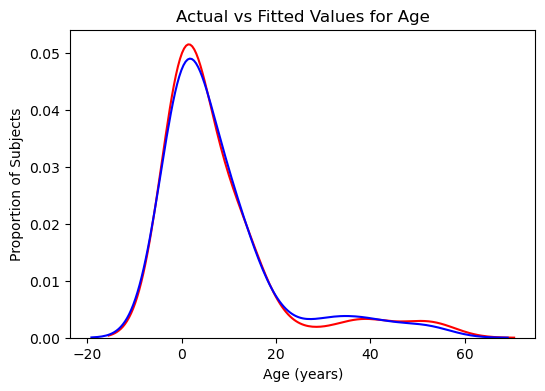

In [28]:
Yhat = lm.predict(dftotal)
width = 6
height = 4
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Age')
plt.xlabel('Age (years)')
plt.ylabel('Proportion of Subjects')

plt.show()
plt.close()

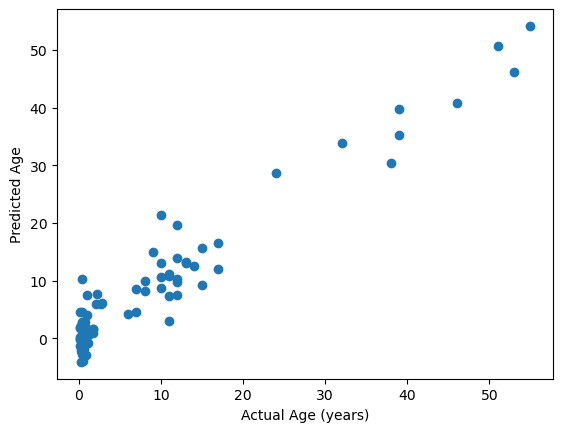

In [32]:
#Create a prediction of Ages from the model
yhat_train = lm.predict(dftotal)

#Plot the relationaship between the Actual and Predicted Ages
plt.scatter(dfy, yhat_train)
plt.xlabel("Actual Age (years)")
plt.ylabel("Predicted Age")
plt.show()

In [46]:
#Created single subject predictions from naive dataset
yhat_t1 = lm.predict(df1_new1)
yhat_t2 = lm.predict(df1_new2)
yhat_t3 = lm.predict(df1_new3)
yhat_t4 = lm.predict(df1_new4)

print("Predicted naive dataset Ages from our model are: %.2f" % yhat_t1[0], " , %.2f" % yhat_t2[0], " , %.2f" % yhat_t3[0], " , %.2f" % yhat_t4[0])

Predicted naive dataset Ages from our model are: 0.86  , 4.59  , -2.98  , -118.37


In [56]:
#Create a second linear regression model that is fixed with y-intercept (age) of 0
lmf = LinearRegression(fit_intercept=False)
modelf = lmf.fit(dftotal, dfy)

#Output R^2 for this linear regresssion model
print('The R-square is: ', lmf.score(dftotal, dfy))

The R-square is:  0.9079149468222741


C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\1145108867.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\1145108867.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

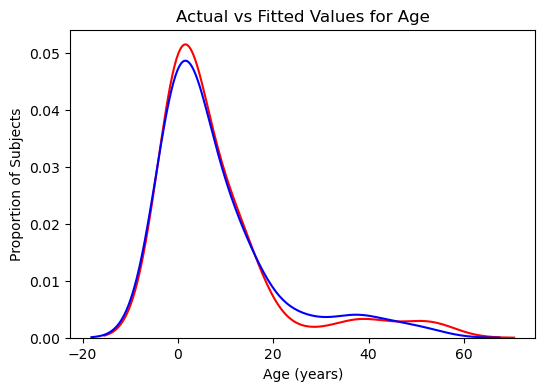

In [58]:
#Creating a fixed Y-intercept of 0
Yhatf = lmf.predict(dftotal)
width = 6
height = 4
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
sns.distplot(Yhatf, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Age')
plt.xlabel('Age (years)')
plt.ylabel('Proportion of Subjects')

plt.show()
plt.close()

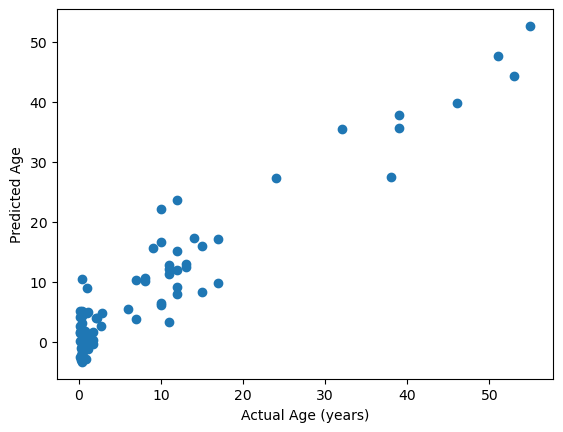

In [54]:
#Create a prediction of Ages from the 0 intercept model
yhat_trainf = lmf.predict(dftotal)

#Plot the relationaship between the Actual and Predicted Ages
plt.scatter(dfy, yhat_trainf)
plt.xlabel("Actual Age (years)")
plt.ylabel("Predicted Age")
plt.show()

In [60]:
#Created single subject predictions from naive dataset
yhat_t1 = lmf.predict(df1_new1)
yhat_t2 = lmf.predict(df1_new2)
yhat_t3 = lmf.predict(df1_new3)
yhat_t4 = lmf.predict(df1_new4)

print("Predicted naive dataset Ages from our model are: %.2f" % yhat_t1[0], " , %.2f" % yhat_t2[0], " , %.2f" % yhat_t3[0], " , %.2f" % yhat_t4[0])

Predicted naive dataset Ages from our model are: 0.61  , 6.03  , 1.96  , -103.03


In [64]:
#Evaluating coefficients from our 2 models
print ('Free model Coefficients: ', lm.coef_)
print ('Free model Intercept: ', lm.intercept_)
print ('Fixed model Coefficients: ', lmf.coef_)
print ('Fixed model Y Intercept: ', lmf.intercept_)

Free model Coefficients:  [-4.39768306e+00  1.91500657e+03 -3.75656515e+00  1.81987631e+03
  8.03874434e+04  9.88694087e+03 -1.94804841e+03 -1.99193244e+00
  3.39010019e+01  7.35458687e+01 -5.30540888e+04  3.43073648e+02
 -1.68005330e+02 -3.10199731e-01 -2.40140295e+00 -8.99594225e+01
  4.33579727e+00 -1.99695103e+03  3.46376925e+00 -1.73602339e+03
  2.50229858e+04 -1.03281132e+04  2.18376570e+03  1.92087748e+00
 -2.31677186e+01 -9.71871166e+00 -5.30540888e+04  3.43073647e+02
 -1.68005327e+02  3.67657768e-01  1.72786437e+00 -8.35041925e+00]
Free model Intercept:  200.41136046773065
Fixed model Coefficients:  [-1.01521399e+01  1.40328078e+03 -2.05035612e+01  1.39218413e+03
 -1.72049412e+05  1.07931495e+04 -7.86064214e+02 -1.83590207e+00
  1.86153938e+01  2.71320594e+02  7.21322006e+04  1.01919596e+03
  9.73346361e+01  1.74401309e-01  4.62676433e-01 -2.34646849e+01
  1.02154798e+01 -1.49394619e+03  2.08401620e+01 -1.33824557e+03
  2.71585906e+04 -1.25684298e+04  5.65070030e+02  1.9396375

In [72]:
#Drop all HR and IBI features from original dataset
df_drop_hr = df.drop(['Age (years)','Avg IBI (ms, 512)', 'CoV Avg IBI', 'Avg iPR (bpm, 512)', 'CoV Avg iPR', 'Avg IBI 256', 'CoV IBI256', 'Avg iHR 256', 'Cov iHR256'], axis=1)

#Drop all HR and IBI features from unkown age data
df1_drop_hr = df1.drop(['Avg IBI (ms, 512)', 'CoV Avg IBI', 'Avg iPR (bpm, 512)', 'CoV Avg iPR', 'Avg IBI 256', 'CoV IBI256', 'Avg iHR 256', 'Cov iHR256'], axis=1)

#Split unknown age dataset for prediction
df1_new1_hr = df1_drop_hr.iloc[[0]].copy()
df1_new2_hr = df1_drop_hr.iloc[[1]].copy()
df1_new3_hr = df1_drop_hr.iloc[[2]].copy()
df1_new4_hr = df1_drop_hr.iloc[[3]].copy()

df_drop_hr.head(3)

,"No Change Count Z[SDNN, 512]","Low Count Z<2 [SDNN, 512]","High Count Z>4 [SDNN, 512]","Avg C[SDNN, 512]","CoV C[SDNN, 512]",High Count >4 C[SDNN],"No Change Count Z[rMSSD, 512]","Low Count Z<2 [rMSSD, 512]","High Count Z>4 [rMSSD, 512]","Avg C[rMSSD, 512]",...,High Count Z[SDNN]256 >4 Z,Avg C[SDNN]256,CoV C[SDNN]256,High Count C[SDNN]256 >4 Z,No Change Count Z[rMSSD]256,Low Count Z[rMSSD]256,High Count Z[rMSSD]256 >4 Z,Avg C[rMSSD]256,CoV C[rMSSD]256,High Count C[rMSSD]256 >4 Z
0,0.035964,0.157221,0.630649,7.390505,0.437843,0.937445,0.035965,0.153694,0.622596,10.492004,...,0.629157,7.335036,0.511143,0.912990,0.035965,0.153694,0.622596,9.846881,0.769917,0.926733
1,0.030473,0.090874,0.759070,10.880912,0.269356,0.999793,0.030474,0.089289,0.762547,11.204047,...,0.758511,10.859556,0.295848,0.998820,0.030474,0.089289,0.762547,11.121304,0.332246,0.998347
2,0.078235,0.158013,0.568447,6.761869,0.744266,0.826976,0.078236,0.159801,0.569466,8.143339,...,0.569159,6.624413,0.814255,0.778069,0.078236,0.159801,0.569466,7.848026,1.445101,0.739670


In [76]:
#Create initial linear regression model, note this model is not fit to pass through Age = 0
lm_hr = LinearRegression()
model_hr = lm_hr.fit(df_drop_hr, dfy)

#Output R^2 for this linear regresssion model
print('The R-square is: ', lm_hr.score(df_drop_hr, dfy))


The R-square is:  0.9113827276608452


C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\146644367.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\146644367.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

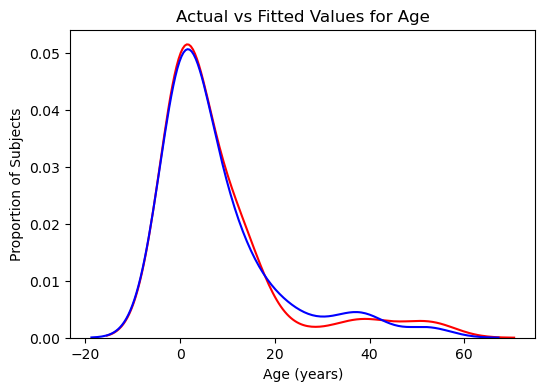

In [78]:
Yhat_hr = lm_hr.predict(df_drop_hr)
width = 6
height = 4
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_hr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Age')
plt.xlabel('Age (years)')
plt.ylabel('Proportion of Subjects')

plt.show()
plt.close()

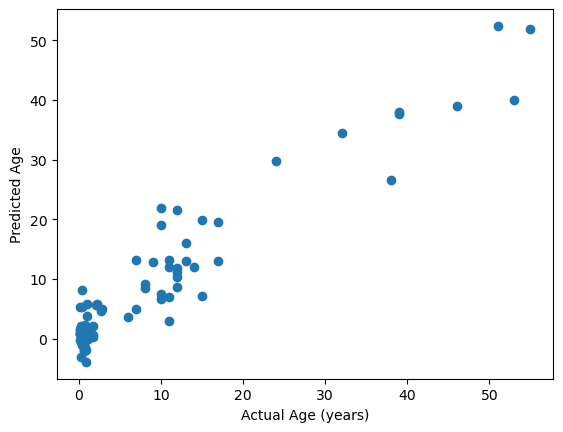

In [80]:
#Create a prediction of Ages from the model
yhat_train_hr = lm_hr.predict(df_drop_hr)

#Plot the relationaship between the Actual and Predicted Ages
plt.scatter(dfy, yhat_train_hr)
plt.xlabel("Actual Age (years)")
plt.ylabel("Predicted Age")
plt.show()

In [86]:
#Created single subject predictions from naive dataset
yhat_t1_hr = lm_hr.predict(df1_new1_hr)
yhat_t2_hr = lm_hr.predict(df1_new2_hr)
yhat_t3_hr = lm_hr.predict(df1_new3_hr)
yhat_t4_hr = lm_hr.predict(df1_new4_hr)

print("Predicted naive dataset Ages from our model are: %.2f" % yhat_t1_hr[0], " , %.2f" % yhat_t2_hr[0], " , %.2f" % yhat_t3_hr[0], " , %.2f" % yhat_t4_hr[0])

Predicted naive dataset Ages from our model are: 2.73  , 1.89  , 0.74  , -72.65


In [88]:
#Create initial linear regression model, note this model is fit to pass through Age = 0
lm_hrf = LinearRegression(fit_intercept=False)
model_hrf = lm_hrf.fit(df_drop_hr, dfy)

#Output R^2 for this linear regresssion model
print('The R-square is: ', lm_hrf.score(df_drop_hr, dfy))

The R-square is:  0.8648365901955906


C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\3362063239.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
C:\Users\mikec\AppData\Local\Temp\ipykernel_48568\3362063239.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

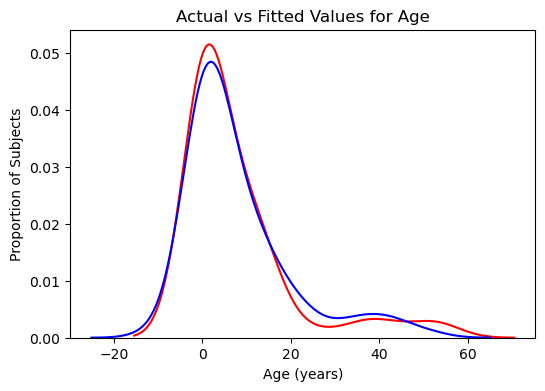

In [90]:
#Creating a fixed Y-intercept of 0
Yhatff = lm_hrf.predict(df_drop_hr)
width = 6
height = 4
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfy, hist=False, color="r", label="Actual Value")
sns.distplot(Yhatff, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Age')
plt.xlabel('Age (years)')
plt.ylabel('Proportion of Subjects')

plt.show()
plt.close()

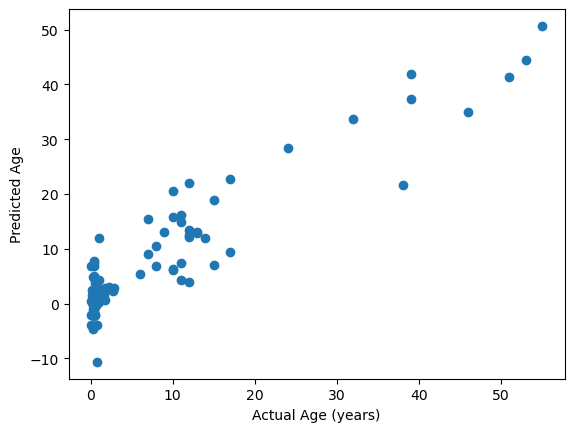

In [92]:
#Create a prediction of Ages from the model
yhat_train_hrf = lm_hrf.predict(df_drop_hr)

#Plot the relationaship between the Actual and Predicted Ages
plt.scatter(dfy, yhat_train_hrf)
plt.xlabel("Actual Age (years)")
plt.ylabel("Predicted Age")
plt.show()

In [94]:
#Created single subject predictions from naive dataset
yhat_t1_hrf = lm_hrf.predict(df1_new1_hr)
yhat_t2_hrf = lm_hrf.predict(df1_new2_hr)
yhat_t3_hrf = lm_hrf.predict(df1_new3_hr)
yhat_t4_hrf = lm_hrf.predict(df1_new4_hr)

print("Predicted naive dataset Ages from our model are: %.2f" % yhat_t1_hrf[0], " , %.2f" % yhat_t2_hrf[0], " , %.2f" % yhat_t3_hrf[0], " , %.2f" % yhat_t4_hrf[0])

Predicted naive dataset Ages from our model are: -3.99  , 9.17  , 1.86  , -174.26


In [96]:
#Evaluating coefficients from our 2 models
print ('Free model Coefficients: ', lm_hr.coef_)
print ('Free model Intercept: ', lm_hr.intercept_)
print ('Fixed model Coefficients: ', lm_hrf.coef_)
print ('Fixed model Y Intercept: ', lm_hrf.intercept_)

Free model Coefficients:  [ 7.96531411e+04  1.01213217e+04 -1.37947815e+03 -3.24531301e+00
  6.12254396e+00  1.12460506e+02 -5.25076469e+04  4.42683466e+02
 -1.56937578e+02 -1.42323557e-01 -2.13235976e+00 -8.11962577e+01
  2.49192490e+04 -1.08762286e+04  1.59656768e+03  3.32501431e+00
 -5.07766777e-01 -3.57512110e+01 -5.25076469e+04  4.42683467e+02
 -1.56937578e+02  1.82776965e-01  1.63523541e+00 -2.48049350e+01]
Free model Intercept:  120.69351471894423
Fixed model Coefficients:  [-1.34955699e+05  1.29729902e+04 -1.21118766e+03 -4.13026227e+00
  8.77630746e+00  5.69132916e+02  5.11184309e+04  1.41078204e+03
  4.98632477e+01  3.23077974e-01 -1.01444248e+00 -1.39093212e+02
  3.16722622e+04 -1.52683151e+04  1.13907404e+03  4.28383155e+00
 -5.38829880e+00 -3.78674971e+02  5.11184309e+04  1.41078204e+03
  4.98632474e+01 -4.34822387e-01  7.57414918e-01 -7.20336771e+01]
Fixed model Y Intercept:  0.0


In [100]:
#Import libraries for statistical analysis and post-hoc analysis
import pylab as pl
import statsmodels.api as sa
import statsmodels.formula.api as sfa
#import scikit_posthocs as sp - appears to not be importable in this way

ModuleNotFoundError: No module named 'scikit_posthocs'

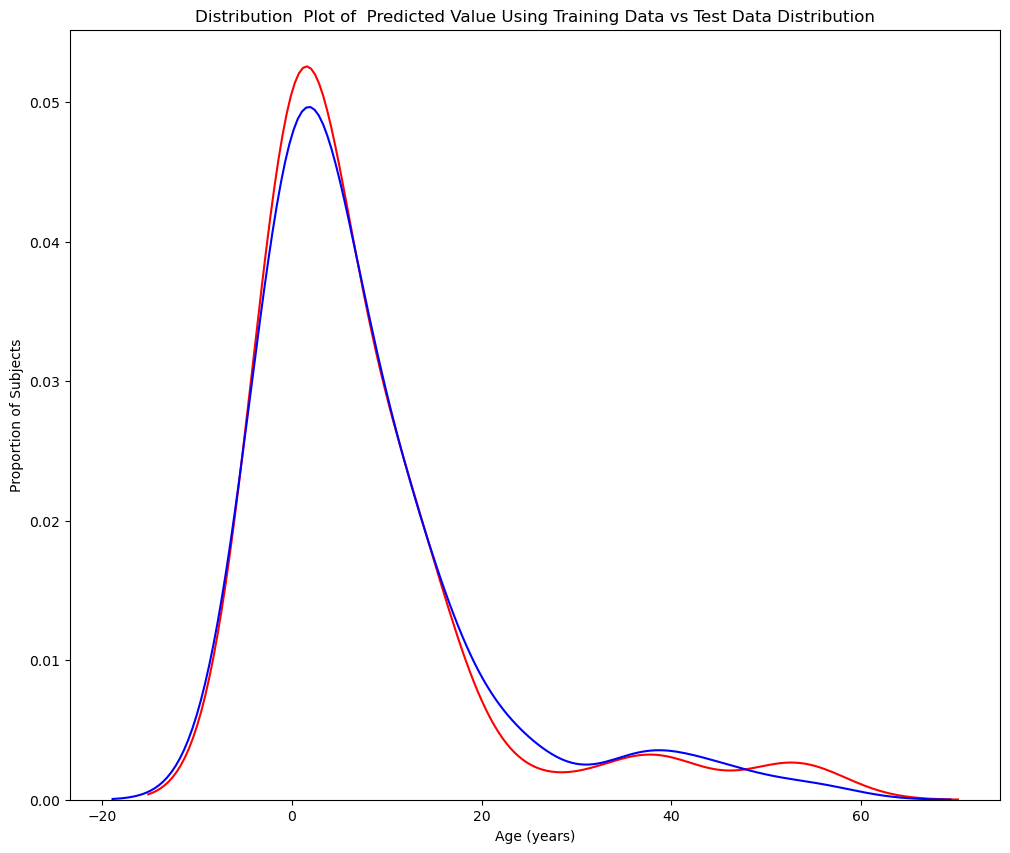

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, dfy, test_size=0.05, random_state=0)

lrn = LinearRegression(fit_intercept=False)

lrn.fit(X_train, y_train)

yhat_train = lrn.predict(X_train)
yhat_test = lrn.predict(X_test)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Test Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Test)", Title)

#print("number of test samples :", X_test.shape[0])
#print("number of training samples:",X_train.shape[0])'

In [284]:
lrm = LinearRegression()
model = lrm.fit(df, dfy)
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)
test = lrm.fit(X_train, y_train)
y_test


2     46.00
13    13.00
53     0.42
41     0.25
86     0.75
Name: Age (years), dtype: float64

In [306]:
yhat_t2 = lrn.predict(df1_new4)
yhat_t2

array([-126.03123951])

In [288]:
Rcross = cross_val_score(lrn, df, dfy, cv=10)
Rcross
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
-1 * cross_val_score(lrn,df, dfy,cv=10,scoring='neg_mean_squared_error')

The mean of the folds are -601.2754301625843 and the standard deviation is 1311.5511833643043


array([9.41624231e+02, 6.98896688e+03, 1.55308227e+01, 4.07649280e+01,
       8.96394583e+00, 1.22671694e+01, 4.13711031e+02, 4.10027701e+00,
       2.08208398e+01, 2.03068592e+03])

In [290]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

RR=Ridge()
RR

Grid1 = GridSearchCV(RR, parameters1,cv=20)
Grid1.fit(df, dfy)
BestRR=Grid1.best_estimator_
BestRR

BestRR.score(df, dfy)

0.6003923540676642